In [220]:
import pandas as pd
df = pd.read_csv("Count_dataCSV/gene_reads_v10_skin_sun_exposed_lower_leg.csv")
df = df.drop(columns=["Name"])
df = df.set_index("Description")
df.columns = ['-'.join(col.split('-')[:2]) for col in df.columns]
print(df)

             GTEX-111CU  GTEX-111FC  GTEX-111VG  GTEX-1122O  GTEX-1128S  \
Description                                                               
DDX11L1               0           0           0           1           0   
WASH7P              222         233          88         103         214   
MIR6859-1             0           0           0           0           0   
MIR1302-2HG           0           0           0           1           0   
FAM138A               0           0           1           0           0   
...                 ...         ...         ...         ...         ...   
MT-ND6           231071       89061      158811       93284      326387   
MT-TE                72          31          48          59         113   
MT-CYB          1091884      767763      386182      236678      777276   
MT-TT                 2           1           0           3           2   
MT-TP                 6           5           3           0           2   

             GTEX-113IC 

In [221]:
file_path = "GTEx_Analysis_v10_Annotations_SubjectPhenotypesDS.txt"
gtex_data = pd.read_csv(file_path, sep="\t")
# print(gtex_data.head())
chronage = pd.DataFrame()
chronage["sampleid"] = gtex_data["SUBJID"]
chronage["age"] = gtex_data["AGE"].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if '-' in x else int(x))
print(chronage.head())

     sampleid   age
0  GTEX-1117F  64.5
1  GTEX-111CU  54.5
2  GTEX-111FC  64.5
3  GTEX-111VG  64.5
4  GTEX-111YS  64.5


In [222]:
length_frame = pd.read_csv("Length_dataCSV/skin_bp_length.csv")
length_frame.columns = ["Symbol", "Length"]
length_frame = length_frame.set_index("Symbol")
print(length_frame.head())

          Length
Symbol          
TSPAN6      4535
TNMD        1610
DPM1        1207
SCYL3       6883
C1orf112    5967


In [223]:
common_subject_ids = df.columns.intersection(chronage['sampleid'])
df_filtered = df[common_subject_ids]
chronage_filtered = chronage[chronage['sampleid'].isin(common_subject_ids)]


In [224]:
df_filtered= df_filtered.loc[~df_filtered.index.duplicated(keep='first')]
length_frame = length_frame.loc[~length_frame.index.duplicated(keep='first')]

In [225]:
common_gene_names = df_filtered.index.intersection(length_frame.index)
df_filtered = df_filtered.loc[common_gene_names]
length_frame_filtered = length_frame[length_frame.index.isin(common_gene_names)]

In [226]:
from racpy import RNAAgeCalc
rac_obj = RNAAgeCalc(tissue = "skin", exprtype="count", idtype="symbol", signature="DESeq2")

In [227]:
res = rac_obj.predict_age(exprdata=df_filtered,genelength=length_frame_filtered, chronage=chronage_filtered)
res.to_csv("Outputs/DESeq2/CSVs/skin_rnaCalc_deseq.csv")
print(res)


10.93% genes in the gene signature are not included in the supplied gene expression.
                RNAAge  ChronAge  AgeAccelResid
GTEX-111CU   75.075810      54.5     -12.820058
GTEX-111FC  106.575162      64.5      10.059809
GTEX-111VG   95.580327      64.5      -0.935026
GTEX-1122O  103.519280      64.5       7.003927
GTEX-1128S  116.640746      64.5      20.125393
...                ...       ...            ...
GTEX-ZYW4    75.312333      64.5     -21.203019
GTEX-ZYY3   100.492093      64.5       3.976741
GTEX-ZZ64    62.988831      24.5       0.951418
GTEX-ZZPT    88.815628      54.5       0.919760
GTEX-ZZPU    80.836917      54.5      -7.058951

[754 rows x 3 columns]


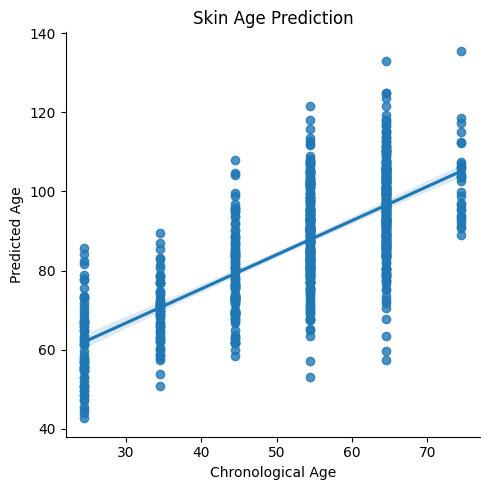

In [228]:
import matplotlib.pyplot as plt
from racpy import makeplot
makeplot(res, main="Skin Age Prediction", xlab="Chronological Age", ylab="Predicted Age")
plt.tight_layout()
plt.savefig("Outputs/DESeq2/Plots/skin_rnaCalc_deseq.png")
plt.show()